<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Nov10-11/3Layer%2C3neurons%2Cnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Programa el método de "forward" propagation para una red neuronal de 3 capas, con 2 neuronas en la primera capa oculta, y 1 en la capa de salida. Usa la función de activación sigmoide en todas las neuronas. Usa el código para hacer una primera predicción usando el conjunto de datos de perros y gatos.

* Nota que no se pide realizar la optimización de los pesos ("backward propagation"), es decir solo se requiere hacer una iteración.

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [3]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files = glob.glob('/content/drive/MyDrive/Machine Learning/Data/CATS_DOGS/*')

In [4]:
len(files)

1787

In [5]:
# Numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes.

Preparamos el dataset de entrenamiento.

In [6]:
train_x = []
train_y = []
for file in files[:835]:
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

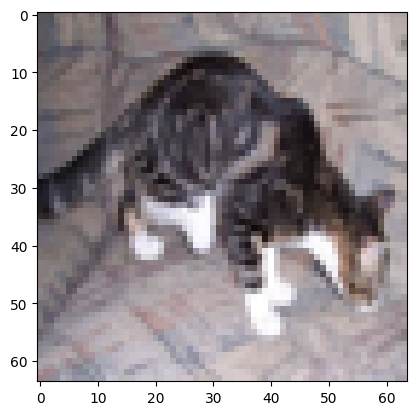

In [7]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba.

In [8]:
test_x = []
test_y = []
for file in files[835:]:
    #print(file)
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

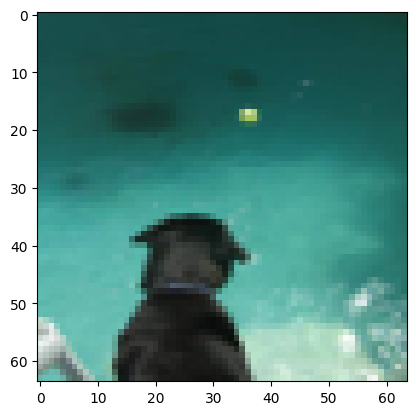

In [9]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [10]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes.

In [11]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    # Ambas neuronas de la capa oculta reciben la misma entrada
    A1_1 = A1[0, :]
    A1_2 = A1[1, :]
    Z2 = np.array([A1_1, A1_2])  # Salidas de las neuronas de la capa oculta
    A2 = sigmoid(np.dot(W2, Z2) + b2)  # Salida de la capa de salida
    return A2

# Inicialización de parámetros
input_size = num_px * num_px * 3
hidden_size = 2
output_size = 1

W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Forward propagation
predictions = forward_propagation(W1, b1, W2, b2, train_set_x)

# Visualizar algunas predicciones
for i in range(5):
    print("Predicción:", predictions[0, i], "Etiqueta verdadera:", train_set_y[0, i])

Predicción: 0.5010592431423097 Etiqueta verdadera: 0
Predicción: 0.5009625683994392 Etiqueta verdadera: 0
Predicción: 0.5011920739421464 Etiqueta verdadera: 0
Predicción: 0.5009188709389801 Etiqueta verdadera: 0
Predicción: 0.5011127209554138 Etiqueta verdadera: 0


In [22]:
predictions

array([[0.50105924, 0.50096257, 0.50119207, 0.50091887, 0.50111272,
        0.50110436, 0.50086967, 0.50105568, 0.50083548, 0.50117303,
        0.5011285 , 0.50113149, 0.50107126, 0.50105633, 0.50115959,
        0.50117366, 0.50099066, 0.50103653, 0.50102219, 0.50098551,
        0.50107331, 0.50100971, 0.50106296, 0.50108815, 0.50115794,
        0.50091642, 0.501073  , 0.50098253, 0.5011088 , 0.50114049,
        0.50105222, 0.50123405, 0.50100136, 0.50114067, 0.50088919,
        0.50096316, 0.50102028, 0.50091522, 0.50122152, 0.50101976,
        0.50114122, 0.50094255, 0.50104276, 0.50099275, 0.50098717,
        0.50113979, 0.50109591, 0.50104625, 0.50111572, 0.5012215 ,
        0.5011422 , 0.50097636, 0.50101411, 0.50108161, 0.50106301,
        0.50105638, 0.50105572, 0.50096559, 0.50106127, 0.50106177,
        0.5010407 , 0.50089276, 0.50113324, 0.50112156, 0.50105734,
        0.50107788, 0.50100742, 0.50111195, 0.50114868, 0.50114368,
        0.50121214, 0.50115988, 0.50099029, 0.50